In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
ch=fetch_california_housing()
df=pd.DataFrame(ch.data,columns=ch.feature_names)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


# Estandarización
La variable resultante $X'$, tiene media en cero y desviación estándar uno:
$$
X'=\frac{X-\mu}{\sigma},
$$
donde $\mu$ y $\sigma$ son la media y desviación estándar de $X$ respectivamente.

In [3]:
# Usando Numpy
m=df.mean()
s=df.std()
Z=(df-m)/s # Variable transformada
Z.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,7.711317e-17,3.855658e-17,7.711317e-17,-1.046536e-16,-1.927829e-17,6.885104e-19,-9.914550e-16,-8.570577e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.774256e+00,-2.196127e+00,-1.852274e+00,-1.610729e+00,-1.256092e+00,-2.289944e-01,-1.447533e+00,-2.385935e+00
25%,-6.881019e-01,-8.453727e-01,-3.994399e-01,-1.911670e-01,-5.637952e-01,-6.170912e-02,-7.967694e-01,-1.113182e+00
50%,-1.767908e-01,2.864502e-02,-8.078293e-02,-1.010626e-01,-2.291262e-01,-2.431526e-02,-6.422715e-01,5.389006e-01
75%,4.592952e-01,6.642943e-01,2.519554e-01,6.015724e-03,2.644885e-01,2.037404e-02,9.729330e-01,7.784775e-01
max,5.858144e+00,1.856137e+00,5.516190e+01,6.957003e+01,3.024960e+01,1.194162e+02,2.957996e+00,2.625216e+00


In [4]:
# Usando una función definida
from scipy.stats import zscore

In [5]:
Z=zscore(df) # Usa la desviación estándar poblacional como escalamiento
Z.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


In [6]:
# Usando Sklearn
from sklearn.preprocessing import StandardScaler

In [7]:
standard=StandardScaler()

m_standard=standard.fit_transform(df)
m_standard.mean(axis=0)

array([ 6.60969987e-17,  5.50808322e-18,  6.60969987e-17, -1.06030602e-16,
       -1.10161664e-17,  3.44255201e-18, -1.07958431e-15, -8.52651283e-15])

In [8]:
m_standard.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
standard.mean_ # Media de los datos originales

array([ 3.87067100e+00,  2.86394864e+01,  5.42899974e+00,  1.09667515e+00,
        1.42547674e+03,  3.07065516e+00,  3.56318614e+01, -1.19569704e+02])

In [10]:
standard.scale_ # Desviación estándar de los datos originales

array([1.89977569e+00, 1.25852527e+01, 2.47411320e+00, 4.73899376e-01,
       1.13243469e+03, 1.03857980e+01, 2.13590065e+00, 2.00348319e+00])

# Escalamiento por cuantiles
La variable transformada $X'$, tiene mediana en cero y desviación estándar uno:
$$
X'=\frac{X-Q_2}{Q_3-Q_1},
$$
donde $Q_1$, $Q_2$ y $Q_3$ son los cuartiles de $X$.

In [11]:
# Usando Numpy
Q=np.quantile(df,[0.25,0.5,0.75],axis=0)
Q

array([[ 2.56340000e+00,  1.80000000e+01,  4.44071624e+00,
         1.00607905e+00,  7.87000000e+02,  2.42974115e+00,
         3.39300000e+01, -1.21800000e+02],
       [ 3.53480000e+00,  2.90000000e+01,  5.22912879e+00,
         1.04878049e+00,  1.16600000e+03,  2.81811565e+00,
         3.42600000e+01, -1.18490000e+02],
       [ 4.74325000e+00,  3.70000000e+01,  6.05238095e+00,
         1.09952607e+00,  1.72500000e+03,  3.28226092e+00,
         3.77100000e+01, -1.18010000e+02]])

In [12]:
X_cuantil=(df-Q[1])/(Q[2]-Q[0])
X_cuantil.median()

MedInc        1.018608e-16
HouseAge      0.000000e+00
AveRooms      0.000000e+00
AveBedrms     0.000000e+00
Population    0.000000e+00
AveOccup      0.000000e+00
Latitude      0.000000e+00
Longitude     0.000000e+00
dtype: float64

In [13]:
Q_cuantil=np.quantile(X_cuantil,[0.25,0.75],axis=0)
Q_cuantil[1]-Q_cuantil[0]

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
# Usando Sklearn
from sklearn.preprocessing import RobustScaler

In [15]:
robust=RobustScaler()
X_robust=robust.fit_transform(df)
np.quantile(X_robust,0.5,axis=0)

array([1.01860794e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [16]:
robust.center_ # Mediana de los datos originales

array([ 3.53480000e+00,  2.90000000e+01,  5.22912879e+00,  1.04878049e+00,
        1.16600000e+03,  2.81811565e+00,  3.42600000e+01, -1.18490000e+02])

In [17]:
robust.scale_ # IQR de los datos originales

array([2.17985000e+00, 1.90000000e+01, 1.61166472e+00, 9.34470203e-02,
       9.38000000e+02, 8.52519777e-01, 3.78000000e+00, 3.79000000e+00])

# Normalización basada en la media
La variable transformada tiene media en cero y rango uno
$$
X'=\frac{X-\mu}{\mathrm{max}(X)-\mathrm{min}(X)}.
$$
El intervalo de la variable resultante es $X'\in(-1,1)$.

In [18]:
# Usando Numpy
Xmax=df.max()
Xmin=df.min()

X_media=(df-m)/(Xmax-Xmin)
X_media.describe() # Todos los datos están entre (-1,1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,5.508083e-18,5.508083e-18,1.290957e-18,-1.420053e-18,-3.442552e-19,5.378988e-21,-2.368476e-16,-1.707506e-15
std,1.310204e-01,2.467756e-01,1.753950e-02,1.404874e-02,3.174030e-02,8.358045e-03,2.269875e-01,1.995550e-01
min,-2.324638e-01,-5.419507e-01,-3.248795e-02,-2.262871e-02,-3.986874e-02,-1.913946e-03,-3.285719e-01,-4.761251e-01
25%,-9.015538e-02,-2.086174e-01,-7.005976e-03,-2.685655e-03,-1.789503e-02,-5.157676e-04,-1.808567e-01,-2.221410e-01
50%,-2.316320e-02,7.068893e-03,-1.416892e-03,-1.419802e-03,-7.272534e-03,-2.032280e-04,-1.457876e-01,1.075403e-01
75%,6.017703e-02,1.639316e-01,4.419171e-03,8.451334e-05,8.394945e-03,1.702871e-04,2.208436e-01,1.553490e-01
max,7.675362e-01,4.580493e-01,9.675120e-01,9.773713e-01,9.601313e-01,9.980861e-01,6.714281e-01,5.238749e-01


In [19]:
np.ptp(X_media,axis=0)

MedInc        1.0
HouseAge      1.0
AveRooms      1.0
AveBedrms     1.0
Population    1.0
AveOccup      1.0
Latitude      1.0
Longitude     1.0
dtype: float64

# Escalamiento Mínimo-Máximo
Buscamos que la variable transformada $X'\in[0,1]$:
$$
X'=\frac{X-\mathrm{mín}(X)}{\mathrm{máx}(X)-\mathrm{mín}(X)}.
$$

Aplicable, por ejemplo, a porcentajes de población.

In [20]:
# Usando Numpy
#
Xmin,Xmax

(MedInc          0.499900
 HouseAge        1.000000
 AveRooms        0.846154
 AveBedrms       0.333333
 Population      3.000000
 AveOccup        0.692308
 Latitude       32.540000
 Longitude    -124.350000
 dtype: float64,
 MedInc           15.000100
 HouseAge         52.000000
 AveRooms        141.909091
 AveBedrms        34.066667
 Population    35682.000000
 AveOccup       1243.333333
 Latitude         41.950000
 Longitude      -114.310000
 dtype: float64)

In [21]:
XminMax=(df-Xmin)/(Xmax-Xmin)
XminMax.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358,0.226988,0.199555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# Definimos una variable que esté entre 2 y 5
Xp_min=2
Xp_max=5
X_rango=XminMax*(Xp_max-Xp_min)+Xp_min
X_rango.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,2.697391,3.625852,2.097464,2.067886,2.119606,2.005742,2.985716,3.428375
std,0.393061,0.740327,0.052618,0.042146,0.095221,0.025074,0.680963,0.598665
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,2.426925,3.000000,2.076446,2.059829,2.065921,2.004195,2.443146,2.761952
50%,2.627902,3.647059,2.093213,2.063627,2.097789,2.005132,2.548353,3.750996
75%,2.877922,4.117647,2.110721,2.068140,2.144791,2.006253,3.648247,3.894422
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [23]:
# Usando Sklearn
from sklearn.preprocessing import MinMaxScaler

In [24]:
escalador=MinMaxScaler()
m_minMax=escalador.fit_transform(df)
m_minMax.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
m_minMax.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [26]:
escalador=MinMaxScaler((Xp_min,Xp_max))
m_minMax=escalador.fit_transform(df)
m_minMax.min(axis=0)

array([2., 2., 2., 2., 2., 2., 2., 2.])

In [27]:
m_minMax.max(axis=0)

array([5., 5., 5., 5., 5., 5., 5., 5.])

In [28]:
# Mínimos de las variables originales
escalador.data_min_

array([   0.4999    ,    1.        ,    0.84615385,    0.33333333,
          3.        ,    0.69230769,   32.54      , -124.35      ])

In [29]:
# Máximos de las variables originales
escalador.data_max_

array([ 1.50001000e+01,  5.20000000e+01,  1.41909091e+02,  3.40666667e+01,
        3.56820000e+04,  1.24333333e+03,  4.19500000e+01, -1.14310000e+02])

# Escalamiento por máximo absoluto
$$
X'=\frac{X}{\mathrm{máx}(|X|)}.
$$
Lo aplicamos si tenemos pocos datos o $X$ está centrada.

El rengo de la variable transformada es $X'\in(-1,1]$.

In [30]:
# Usando Numpy
Xabs=df/df.abs().max()
Xabs.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.258043,0.550759,0.038257,0.032192,0.039949,0.002470,0.849389,-0.961558
std,0.126654,0.242030,0.017435,0.013911,0.031738,0.008353,0.050917,0.016112
min,0.033326,0.019231,0.005963,0.009785,0.000084,0.000557,0.775685,-1.000000
25%,0.170892,0.346154,0.031293,0.029533,0.022056,0.001954,0.808820,-0.979493
50%,0.235652,0.557692,0.036848,0.030786,0.032678,0.002267,0.816687,-0.952875
75%,0.316215,0.711538,0.042650,0.032276,0.048344,0.002640,0.898927,-0.949015
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.919260


In [31]:
# Centramos primero X
X_centrada=df-m
Xabs=X_centrada/X_centrada.abs().max()
Xabs.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,1.032766e-17,2.754042e-17,1.204893e-18,-1.463085e-18,-3.442552e-19,1.613696e-20,-3.635335e-16,-3.238753e-15
std,1.707025e-01,4.553470e-01,1.812845e-02,1.437401e-02,3.305829e-02,8.374072e-03,3.380667e-01,3.809210e-01
min,-3.028701e-01,-1.000000e+00,-3.357886e-02,-2.315262e-02,-4.152426e-02,-1.917616e-03,-4.893627e-01,-9.088525e-01
25%,-1.174607e-01,-3.849379e-01,-7.241228e-03,-2.747835e-03,-1.863811e-02,-5.167567e-04,-2.693612e-01,-4.240344e-01
50%,-3.017864e-02,1.304342e-02,-1.464470e-03,-1.452674e-03,-7.574521e-03,-2.036178e-04,-2.171306e-01,2.052785e-01
75%,7.840285e-02,3.024844e-01,4.567562e-03,8.647005e-05,8.743539e-03,1.706137e-04,3.289163e-01,2.965384e-01
max,1.000000e+00,8.451862e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [32]:
# Usando Sklearn
from sklearn.preprocessing import MaxAbsScaler

In [33]:
escalador=MaxAbsScaler()
m_abs=escalador.fit_transform(df)
m_abs.min(axis=0)

array([ 3.33264445e-02,  1.92307692e-02,  5.96264722e-03,  9.78473581e-03,
        8.40760047e-05,  5.56815838e-04,  7.75685340e-01, -1.00000000e+00])

In [34]:
m_abs.max(axis=0)

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        , -0.91926015])

In [35]:
# Centramos la variable
desplazador=StandardScaler(with_std=False) # Desplazamos la media a cero pero no escalamos la desviación estándar
escalador=MaxAbsScaler()

In [36]:
# Primero desplazamos
X_desplazada=desplazador.fit_transform(df)

# Despues escalamos
X_abs=escalador.fit_transform(X_desplazada)
X_abs.min(axis=0)

array([-0.30287008, -1.        , -0.03357886, -0.02315262, -0.04152426,
       -0.00191762, -0.48936271, -0.9088525 ])

In [37]:
X_abs.max(axis=0)

array([1.        , 0.84518624, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

## Regresión

In [38]:
df['MedHouseVal']=ch.target

In [39]:
# Escalamos las variables de tal forma que el resultado esté centrado en cero y con un rango entre (-1,1)
Xp=(df-df.mean())/(df.max()-df.min())

In [40]:
from scipy.stats import yeojohnson

In [41]:
lambdas=[]
X_YJ=df.copy()
for var in df:
  X,lmbd=yeojohnson(Xp[var]) # Usamos Yeo-Johnson en la variable escalada
  lambdas.append(lmbd)
  X_YJ[var]=X

<Axes: >

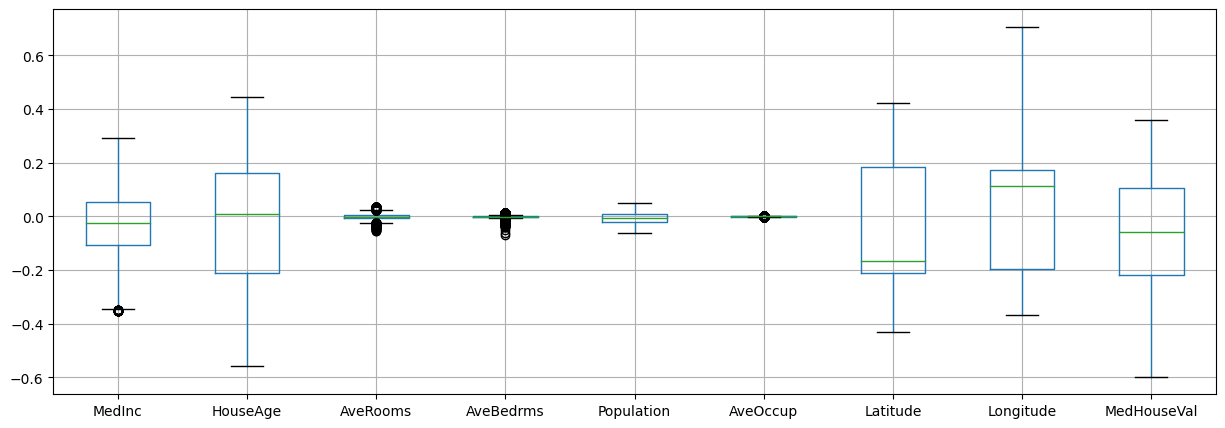

In [42]:
# Escalamos las variables para compararlas usando una métrica (error cuadrático medio).
X_YJ.boxplot(figsize=(15,5))#,whis=3)

In [43]:
vars_robust=[0,2,3,5]
vars_standard=[1,4,6,7]#,8]

In [44]:
esc_robusto=RobustScaler()
esc_estandar=StandardScaler()

In [45]:
X_transformada=df.copy()
X_transformada.iloc[:,vars_robust]=esc_robusto.fit_transform(X_YJ.iloc[:,vars_robust])
X_transformada.iloc[:,vars_standard]=esc_estandar.fit_transform(X_YJ.iloc[:,vars_standard])

In [ ]:
from sklearn.linear_model import LinearRegression